<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [40]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-17 18:28:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.7MB/s    in 2.4s    

2025-09-17 18:28:21 (63.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [41]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [42]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [43]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("survey-data.sqlite")

df.to_sql("main", conn, if_exists="replace", index=False)

print("Data successfully inserted into SQLite database (survey-data.sqlite) in table 'main'.")

conn.close()

Data successfully inserted into SQLite database (survey-data.sqlite) in table 'main'.


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [44]:
conn = sqlite3.connect("survey-data.sqlite")

df_check = pd.read_sql_query("SELECT * FROM main LIMIT 5;", conn)

row_count = pd.read_sql_query("SELECT COUNT(*) as total_rows FROM main;", conn)

print("First 5 rows from table 'main':")
print(df_check)
print("Total rows in table:", row_count['total_rows'][0])

conn.close()

First 5 rows from table 'main':
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [45]:
conn = sqlite3.connect("survey-data.sqlite")
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM main;")
row_count = cursor.fetchone()[0]

print("Total rows in 'main':", row_count)

conn.close()

Total rows in 'main': 65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [46]:
conn = sqlite3.connect("survey-data.sqlite")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in database:")
for table in tables:
    print(table[0])
    
conn.close()

Tables in database:
main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [47]:
conn = sqlite3.connect("survey-data.sqlite")
cursor = conn.cursor()

cursor.execute("""
    SELECT Age, COUNT(*) as RespondentCount
    FROM main
    GROUP BY Age
    ORDER BY RespondentCount DESC;
""")

results = cursor.fetchall()

print("Respondents count by Age group:")
for row in results:
    print(row)

conn.close()

Respondents count by Age group:
('25-34 years old', 23911)
('35-44 years old', 14942)
('18-24 years old', 14098)
('45-54 years old', 6249)
('55-64 years old', 2575)
('Under 18 years old', 2568)
('65 years or older', 772)
('Prefer not to say', 322)


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [48]:
conn = sqlite3.connect("survey-data.sqlite")
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(main);")

schema = cursor.fetchall()

print("Schema of table 'main':")
for col in schema:
    print(col)

conn.close()

Schema of table 'main':
(0, 'ResponseId', 'INTEGER', 0, None, 0)
(1, 'MainBranch', 'TEXT', 0, None, 0)
(2, 'Age', 'TEXT', 0, None, 0)
(3, 'Employment', 'TEXT', 0, None, 0)
(4, 'RemoteWork', 'TEXT', 0, None, 0)
(5, 'Check', 'TEXT', 0, None, 0)
(6, 'CodingActivities', 'TEXT', 0, None, 0)
(7, 'EdLevel', 'TEXT', 0, None, 0)
(8, 'LearnCode', 'TEXT', 0, None, 0)
(9, 'LearnCodeOnline', 'TEXT', 0, None, 0)
(10, 'TechDoc', 'TEXT', 0, None, 0)
(11, 'YearsCode', 'TEXT', 0, None, 0)
(12, 'YearsCodePro', 'TEXT', 0, None, 0)
(13, 'DevType', 'TEXT', 0, None, 0)
(14, 'OrgSize', 'TEXT', 0, None, 0)
(15, 'PurchaseInfluence', 'TEXT', 0, None, 0)
(16, 'BuyNewTool', 'TEXT', 0, None, 0)
(17, 'BuildvsBuy', 'TEXT', 0, None, 0)
(18, 'TechEndorse', 'TEXT', 0, None, 0)
(19, 'Country', 'TEXT', 0, None, 0)
(20, 'Currency', 'TEXT', 0, None, 0)
(21, 'CompTotal', 'REAL', 0, None, 0)
(22, 'LanguageHaveWorkedWith', 'TEXT', 0, None, 0)
(23, 'LanguageWantToWorkWith', 'TEXT', 0, None, 0)
(24, 'LanguageAdmired', 'TEXT', 0,

## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


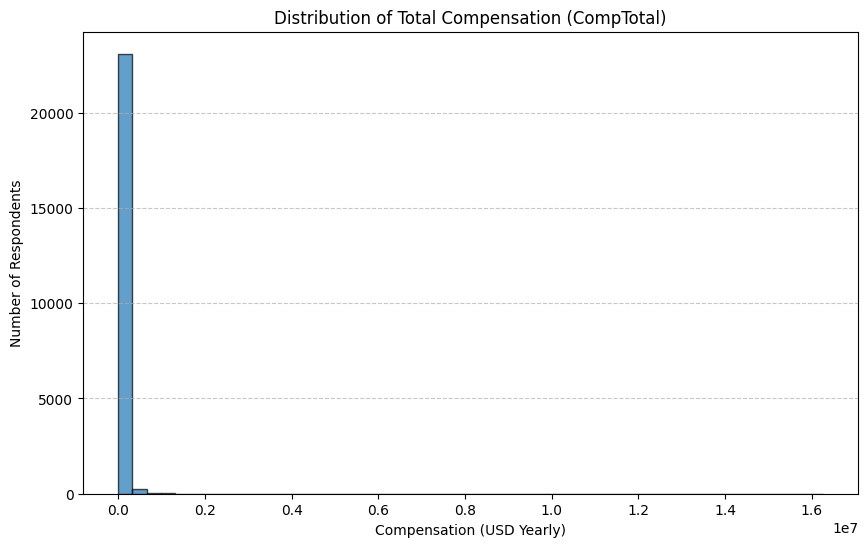

In [49]:
conn = sqlite3.connect("survey-data.sqlite")

df = pd.read_sql_query("SELECT ConvertedCompYearly AS CompTotal FROM main", conn)

conn.close()

df = df.dropna()

plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Total Compensation (CompTotal)")
plt.xlabel("Compensation (USD Yearly)")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Box Plots**

Plot a box plot of Age.


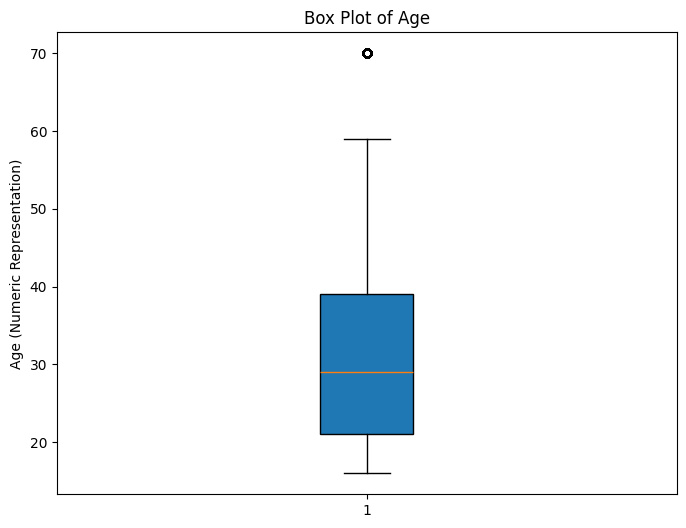

In [50]:
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql_query("SELECT Age FROM main", conn)
conn.close()

df = df.dropna()

age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}

df["Age_numeric"] = df["Age"].map(age_mapping)

plt.figure(figsize=(8,6))
plt.boxplot(df["Age_numeric"].dropna(), vert=True, patch_artist=True)
plt.title("Box Plot of Age")
plt.ylabel("Age (Numeric Representation)")
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


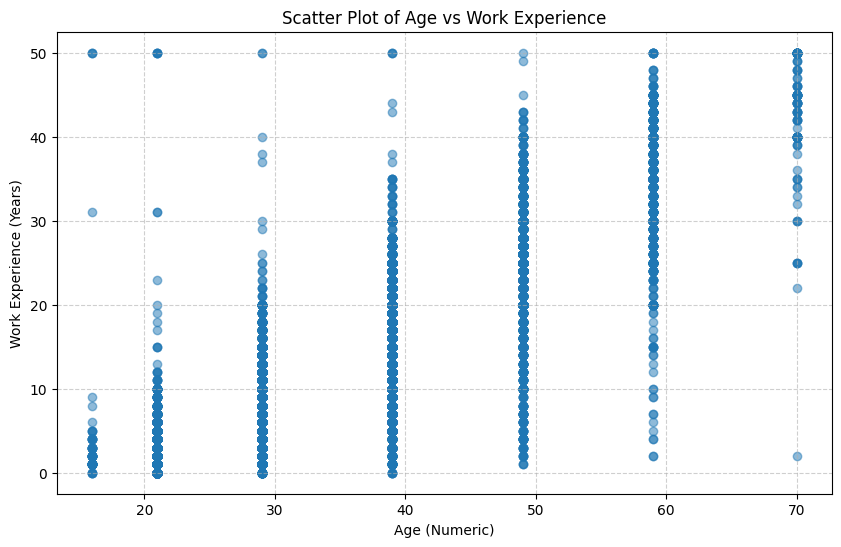

In [51]:
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql_query("SELECT Age, WorkExp FROM main", conn)
conn.close()

df = df.dropna()

age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}
df["Age_numeric"] = df["Age"].map(age_mapping)

df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")

df = df.dropna()

plt.figure(figsize=(10,6))
plt.scatter(df["Age_numeric"], df["WorkExp"], alpha=0.5)
plt.title("Scatter Plot of Age vs Work Experience")
plt.xlabel("Age (Numeric)")
plt.ylabel("Work Experience (Years)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


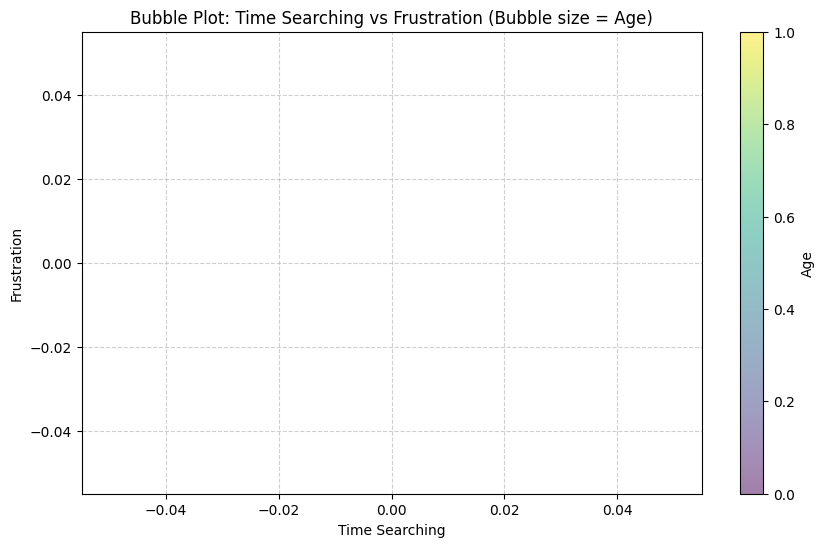

In [52]:
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql_query("SELECT Age, TimeSearching, Frustration FROM main", conn)
conn.close()

df = df.dropna()

age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}
df["Age_numeric"] = df["Age"].map(age_mapping)

df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")
df["Frustration"] = pd.to_numeric(df["Frustration"], errors="coerce")

df = df.dropna()

plt.figure(figsize=(10,6))
plt.scatter(
    df["TimeSearching"],
    df["Frustration"],
    s=df["Age_numeric"]*5,
    alpha=0.5,
    c=df["Age_numeric"],     # Optional: color by Age
    cmap="viridis"
)
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble size = Age)")
plt.xlabel("Time Searching")
plt.ylabel("Frustration")
plt.colorbar(label="Age")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


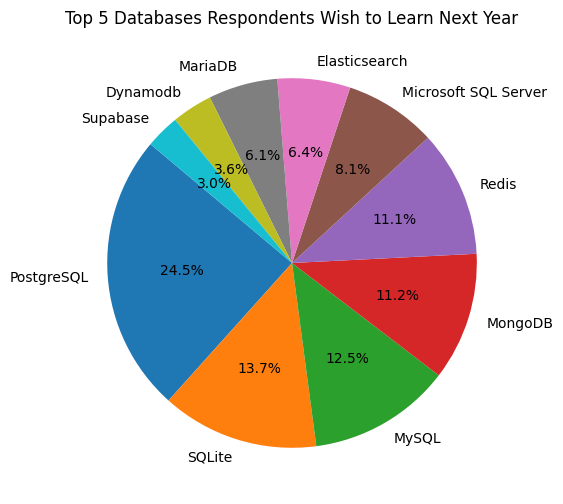

In [53]:
conn = sqlite3.connect("survey-data.sqlite")

query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_db = pd.read_sql_query(query, conn)

all_dbs = df_db["DatabaseWantToWorkWith"].str.split(";").explode()

db_counts = all_dbs.value_counts().head(10)

plt.figure(figsize=(6,6))
plt.pie(db_counts, labels=db_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 5 Databases Respondents Wish to Learn Next Year")
plt.show()

conn.close()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


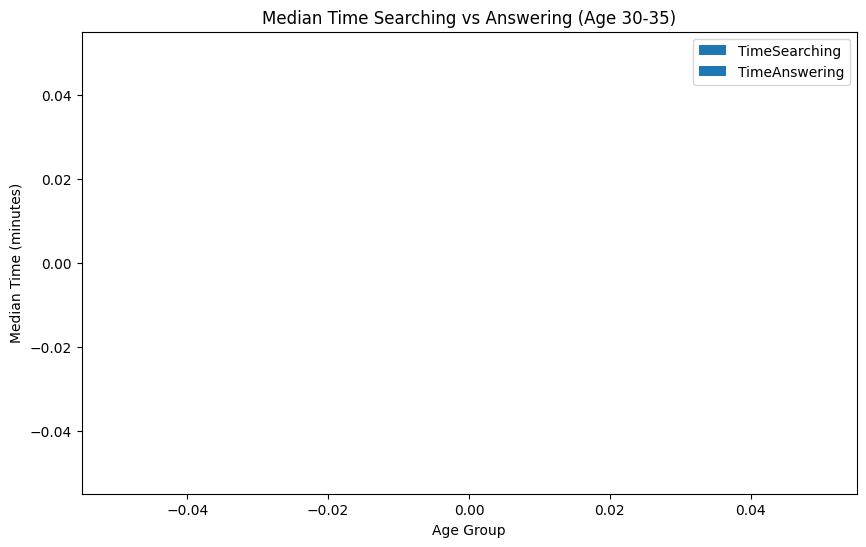

In [57]:
conn = sqlite3.connect('survey-data.sqlite')

query = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
"""
df = pd.read_sql_query(query, conn)
conn.close()

df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

age_map = {
    '18-24 years old': 21,
    '25-29 years old': 27,
    '30-34 years old': 32,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df['AgeNum'] = df['Age'].map(age_map)

df_age = df[(df['AgeNum'] >= 30) & (df['AgeNum'] <= 35)]

median_df = df_age.groupby('Age')[['TimeSearching','TimeAnswering']].median().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
bars_searching = ax.bar(median_df['Age'], median_df['TimeSearching'], label='TimeSearching')
bars_answering = ax.bar(median_df['Age'], median_df['TimeAnswering'], bottom=median_df['TimeSearching'], label='TimeAnswering')

ax.set_xlabel('Age Group')
ax.set_ylabel('Median Time (minutes)')
ax.set_title('Median Time Searching vs Answering (Age 30-35)')
ax.legend()

plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


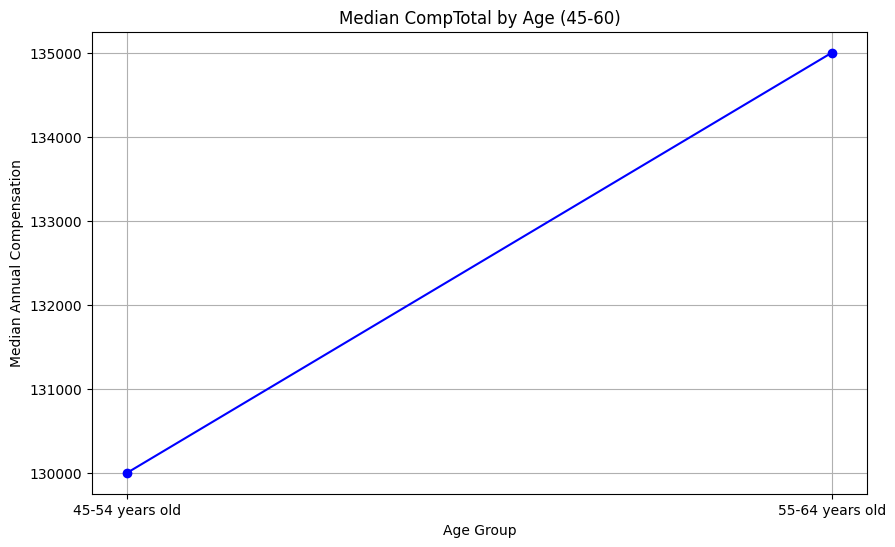

In [58]:
conn = sqlite3.connect('survey-data.sqlite')

query = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(query, conn)
conn.close()

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

age_map = {
    '18-24 years old': 21,
    '25-29 years old': 27,
    '30-34 years old': 32,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df['AgeNum'] = df['Age'].map(age_map)

df_age = df[(df['AgeNum'] >= 45) & (df['AgeNum'] <= 60)]

median_df = df_age.groupby('Age')[['CompTotal']].median().reset_index()

plt.figure(figsize=(10,6))
plt.plot(median_df['Age'], median_df['CompTotal'], marker='o', linestyle='-', color='blue')
plt.xlabel('Age Group')
plt.ylabel('Median Annual Compensation')
plt.title('Median CompTotal by Age (45-60)')
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


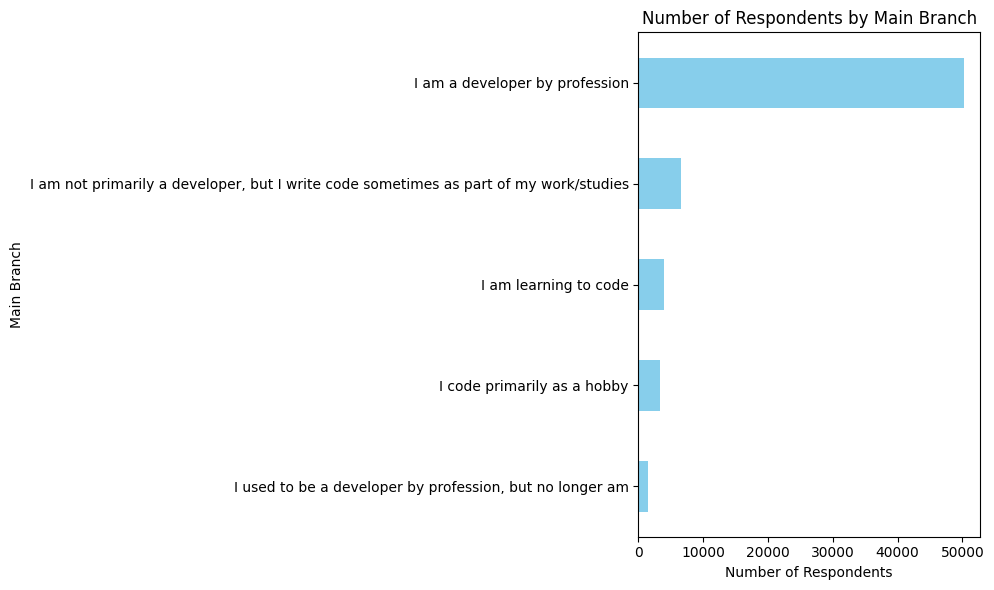

In [59]:
conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT MainBranch FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

branch_counts = df['MainBranch'].value_counts().sort_values()

plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Number of Respondents by Main Branch')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [60]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
